# addvantage and disadvantage of adding layer in LSTM
The same uncertainty about the amount also exists for the number of hidden layers to use. Again,
the ideal number for any given use case will be different and is best to be decided by running different models 
against each other. Generally, 2 layers have shown to be enough to detect more complex features. 
More layers can be better for improving accuracy but also harder to train. 1 hidden layer work with simple problems, 
and two are enough to find reasonably complex features.
source:https://towardsdatascience.com/


As much as one hidden layer is normally sufficient for the large majority of problems,
there are instances where having several layers would be ideal. Problems like language translation, 
building generative chatbots etc are good cases where the deeper you go the more likely for the performance
and accuracy to be improved using Sequence-to-Sequence recurrent neural networks.
To determine the number of hidden layers in such problems is a trial and test approach where you may
add layers depending on the output.
source: https://www.linkedin.com/pulse/generative-chatbots-how-many-lstm-layers-should-you


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
import tensorflow as tf
# For LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [2]:
# Load training data
file = "C:/Users/Mahshid/OneDrive/Documents/LSTM_TCLAB/tclab_data.csv"
train = pd.read_csv(file)

In [3]:
train.head()

,Time,Q1,Q2,T1,T2
0,0.000000,0,0,24.44,0
1,1.000385,0,0,24.44,0
2,2.000896,0,0,24.44,0
3,3.002267,0,0,24.44,0
4,4.002946,0,0,24.44,0


In [4]:
train.describe()

,Time,Q1,Q2,T1,T2
count,14400.000000,14400.000000,14400.0,14400.000000,14400.0
mean,7225.617796,37.649792,0.0,51.225248,0.0
std,4172.240864,20.347736,0.0,10.547532,0.0
min,0.000000,0.000000,0.0,24.410000,0.0
25%,3611.056373,20.000000,0.0,42.490000,0.0
50%,7227.769288,43.000000,0.0,52.480000,0.0
75%,10841.950105,55.000000,0.0,59.677500,0.0
max,14445.452020,70.000000,0.0,74.070000,0.0


In [5]:
# Scale features(for normalizing)
s1 = MinMaxScaler(feature_range=(-1,1))
Xs = s1.fit_transform(train[['T1','Q1']])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(-1,1))
Ys = s2.fit_transform(train[['T1']])

# Each time step uses last 'window' to predict the next change
window = 70
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])
    
# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

# Regression Loss Functions:
1-Mean Squared Error Loss 

2-Mean Squared Logarithmic Error Loss -> tf.keras.losses.MeanSquaredLogarithmicError()

3-Mean Absolute Error Loss -> tf.keras.losses.MeanAbsoluteError()

Resaults showed that the worst error loss function is mean squared logarthmic error and others are similar but the runtime of mean squared error is less than absolute error. The reason of these differences comes from their equations.  


In [17]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()
# sequential=> because of multiple input and multiple output
# adding layer = make higher featers level
# adding units = improving LSTM function
# if units>>0 our model may be overfit and if we have a few units,...
# our model may be underfit
model.add(LSTM(units=50, return_sequences=True, \
          input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

# Increasing batch and epochs:
    
   As you know, if number of batch size or epochs are being risen, accuracy will be better. But also run time will increase too. But in this case I did not see any improving in accuracy and also in loss function(I saw a few changes:) ) with increasing epochs numbers because we have simple model and we do not need to many number of epochs.
    Moreover, when number of batch_size had been increased , Loss has been seldom decreased but I did not observe any changes in accuracy.  
    For solving this problem, we must trade of between accuracy and time and it depends on our model and the perfomance that we need.
    
   Consequences will be shown in pdf file.

# Early stopping
Early stopping requires that you configure your network to be under constrained, meaning that it has more capacity than is required for the problem.

When training the network, a larger number of training epochs is used than may normally be required, to give the network plenty of opportunity to fit, then begin to overfit the training dataset.

There are three elements to using early stopping; they are:

-Monitoring model performance.

-Trigger to stop training.

-The choice of model to use.

monitor: Quantity to be monitored.

mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

patience: Number of epochs with no improvement after which training will be stopped.
verbose: verbosity mode.

In this case, when early stopping had been removed, runtime has been increased. 

In [18]:
# Allow for early exit 
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X, Y, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
58/58 [==============================] - 21s 294ms/step - loss: 0.0130 - accuracy: 2.7913e-04
Epoch 2/10
58/58 [==============================] - 17s 298ms/step - loss: 0.0021 - accuracy: 2.7913e-04
Epoch 3/10
58/58 [==============================] - 18s 315ms/step - loss: 0.0019 - accuracy: 2.7913e-04
Epoch 4/10
58/58 [==============================] - 17s 293ms/step - loss: 0.0016 - accuracy: 2.7913e-04
Epoch 5/10
58/58 [==============================] - 17s 292ms/step - loss: 0.0015 - accuracy: 2.7913e-04
Epoch 6/10
58/58 [==============================] - 17s 300ms/step - loss: 0.0015 - accuracy: 2.7913e-04
Epoch 7/10
58/58 [==============================] - 17s 297ms/step - loss: 0.0014 - accuracy: 2.7913e-04
Epoch 8/10
58/58 [==============================] - 17s 301ms/step - loss: 0.0014 - accuracy: 2.7913e-04
Epoch 9/10
58/58 [==============================] - 18s 318ms/step - loss: 0.0014 - accuracy: 2.7913e-04
Epoch 10/10
58/58 [==============================] - 17

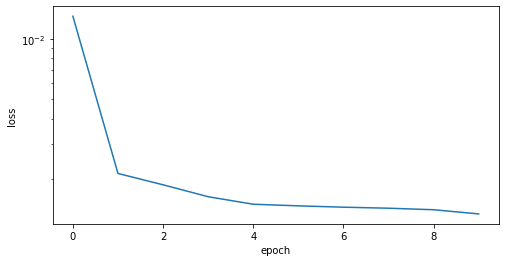

In [19]:
# Plot loss 
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'])
plt.xlabel('epoch'); plt.ylabel('loss')
plt.savefig('tclab_loss.png')
model.save('model.h5')

In [20]:
# Verify the fit of the model
Yp = model.predict(X)

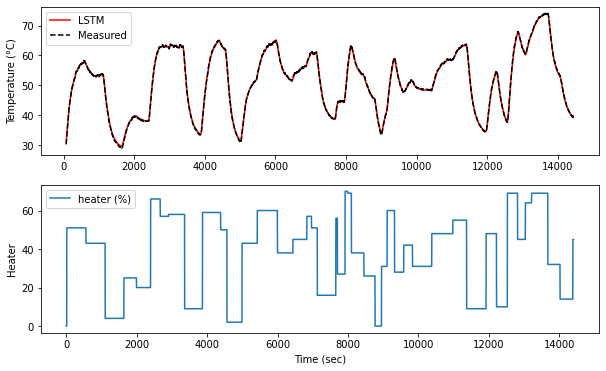

In [21]:
# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(train['Time'][window:],Yu,'r-',label='LSTM')
plt.plot(train['Time'][window:],Ym,'k--',label='Measured')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(train['Q1'],label='heater (%)')
plt.legend()
plt.xlabel('Time (sec)'); plt.ylabel('Heater')
plt.savefig('tclab_fit.png')

In [16]:
# Load model
v = load_model('model.h5')

In [17]:
# Load training data
test = pd.read_csv('C:/Users/Mahshid/OneDrive/Documents/LSTM_TCLAB/tclab_data_training.txt')

Xt = test[['T1','Q1']].values
Yt = test[['T1']].values

Xts = s1.transform(Xt)
Yts = s2.transform(Yt)

Xti = []
Yti = []
for i in range(window,len(Xts)):
    Xti.append(Xts[i-window:i,:])
    Yti.append(Yts[i])


C:\Users\Mahshid\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mahshid\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
# Reshape data to format accepted by LSTM
Xti, Yti = np.array(Xti), np.array(Yti)

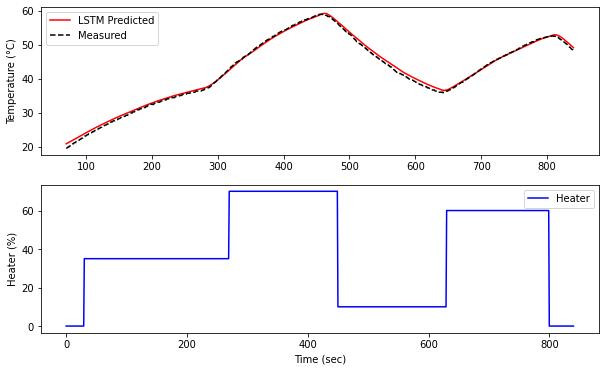

In [19]:
# Verify the fit of the model
Ytp = model.predict(Xti)

# un-scale outputs
Ytu = s2.inverse_transform(Ytp)
Ytm = s2.inverse_transform(Yti)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(test['Time'][window:],Ytu,'r-',label='LSTM Predicted')
plt.plot(test['Time'][window:],Ytm,'k--',label='Measured')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.subplot(2,1,2)
plt.plot(test['Time'],test['Q1'],'b-',label='Heater')
plt.xlabel('Time (sec)'); plt.ylabel('Heater (%)')
plt.legend()
plt.savefig('tclab_validate.png')


In [ ]:
# Using predicted values to predict next step
Xtsq = Xts.copy()
for i in range(window,len(Xtsq)):
    Xin = Xtsq[i-window:i].reshape((1, window, 2))
    Xtsq[i][0] = v.predict(Xin)
    Yti[i-window] = Xtsq[i][0]

#Ytu = (Yti - s2.min_[0])/s2.scale_[0]
Ytu = s2.inverse_transform(Yti)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(test['Time'][window:],Ytu,'r-',label='LSTM Predicted')
plt.plot(test['Time'][window:],Ytm,'k--',label='Measured')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.subplot(2,1,2)
plt.plot(test['Time'],test['Q1'],'b-',label='Heater')
plt.xlabel('Time (sec)'); plt.ylabel('Heater (%)')
plt.legend()
plt.savefig('tclab_forecast.png')
plt.show()